In [1]:
# Import dependencies - run this first
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import rampy as rp
import scipy
from scipy.integrate import simps
from numpy import trapz
from scipy.signal import find_peaks

Imax:  164.2668
peak_index (array([73517]),)
x peak 3.686123
the first index max happen:  73517
Mean baseline current:  -1.82412083907
Peak Current:  164.2668
Area:  13.282199717286783
Pulse Time:  165.5000000000002 milliseconds
Final current:  65.21099083907
[11.33191684 12.09616084 10.94979484 ... 25.08828084 22.03131084
 17.82797084]
Number of local maxima:  5


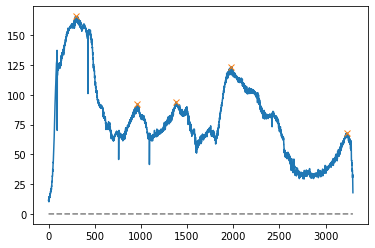

In [8]:
# Extract Metrics
# each file has 4 columns of numbers: a=time, b=current, c=noise, d=+/-b
# dt = a[i+1] - a[i] = 5.0e-05 (S)
filename = '010.txt'
a, b, c, d = np.loadtxt(filename, unpack=True)
Imax = max(b)
print ('Imax: ', Imax)
# X position
peak_index = np.where(b==Imax)
print ('peak_index', peak_index)
# throw away extra 
peak_index = peak_index[0]
# grab the first position
x_peak = a[peak_index[0]]
print('x peak', x_peak)
peak_index = int(peak_index[0])
print ('the first index max happen: ', peak_index)

# Define noise
if x_peak > 0.5: 
    mean = np.mean(b[range(0, 10000)])
    noise = np.std(b[range(0, 10000)])
else: 
    mean = np.mean(b[range(50000, 60000)])
    noise = np.std(b[range(50000, 60000)])
    
print('Mean baseline current: ', mean)
b = np.subtract(b, mean)
# Define discharge region
discharge_index = []
for i in range(peak_index-10000, peak_index+20000):
    while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
        if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
            discharge_index = np.append(discharge_index, i)
        break

discharge_index = np.asfarray(discharge_index)
discharge_index = discharge_index.astype(int)
# print(discharge_index)
discharge_time = a[discharge_index]
discharge_current = b[discharge_index]

print("Peak Current: ", Imax)
# Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
area = trapz(discharge_current, dx=0.00005)
area_simps = simps(discharge_current, dx=0.00005)
print("Area: ", area)

# Calculate discharge time
pulseTime = max(discharge_time) - min(discharge_time)
print("Pulse Time: ", pulseTime*1000, 'milliseconds')

# Catch end current
I_Final = discharge_current[len(discharge_current)-70]
print('Final current: ', I_Final)

from scipy.signal import find_peaks

print(discharge_current)
x = discharge_current
peaks, _ = find_peaks(x, height=0, distance=100, width=50)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.savefig('1oextracted.png', dpi=100)
# Find number of peaks
peak_count = len(peaks)
print("Number of local maxima: ", peak_count)

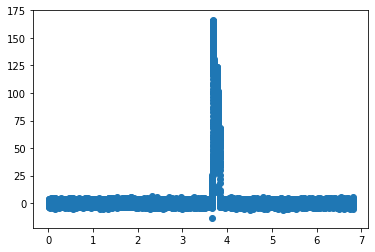

In [7]:
plt.scatter (a, b)
plt.savefig('10current.png', dpi=100)

Imax:  149.3641
peak_index (array([59017, 59022, 59023]),)
x peak 2.960117
the first index max happen:  59017
Mean baseline current:  -1.905168720452
Peak Current:  149.3641
Area:  16.03194539737906
Area_simps:  16.029175018612392
Pulse Time:  418.84999999999997 milliseconds
I_final position  6653
Final current:  12.941448720452
Number of local maxima:  3


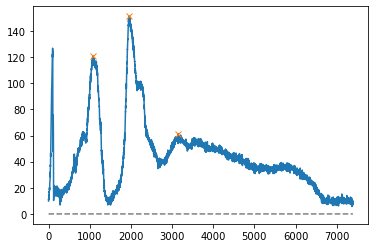

Imax:  88.60687
peak_index (array([90985, 91024]),)
x peak 11.75824
the first index max happen:  90985
Mean baseline current:  -1.876968185738
Peak Current:  88.60687
Area:  2.109495686288599
Area_simps:  2.109845964463599
Pulse Time:  31.500000000001194 milliseconds
I_final position  564
Final current:  85.516258185738
Number of local maxima:  1


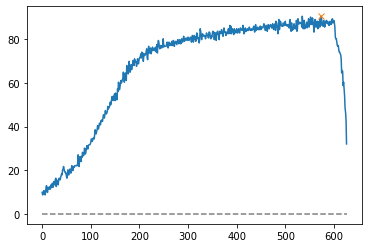

Imax:  88.60687
peak_index (array([55957, 55958]),)
x peak 2.806389
the first index max happen:  55957
Mean baseline current:  -1.891718057619
Peak Current:  88.60687
Area:  7.10860863682951
Area_simps:  7.108630930187845
Pulse Time:  282.59999999999997 milliseconds
I_final position  5031
Final current:  14.838608057619
Number of local maxima:  2


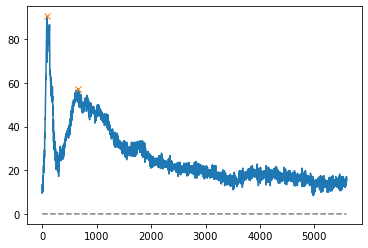

Imax:  102.7453
peak_index (array([58831]),)
x peak 2.952952
the first index max happen:  58831
Mean baseline current:  -1.870319279144
Peak Current:  102.7453
Area:  17.358075406305225
Area_simps:  17.359587967505224
Pulse Time:  330.94999999999965 milliseconds
I_final position  5778
Final current:  24.752349279144
Number of local maxima:  8


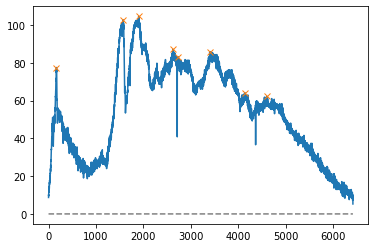

Imax:  70.26505
peak_index (array([95850, 95855]),)
x peak 9.201462
the first index max happen:  95850
Mean baseline current:  -1.860002011087
Peak Current:  70.26505
Area:  3.6733805271736677
Area_simps:  3.6733821193486675
Pulse Time:  102.24999999999973 milliseconds
I_final position  1825
Final current:  21.302942011087
Number of local maxima:  2


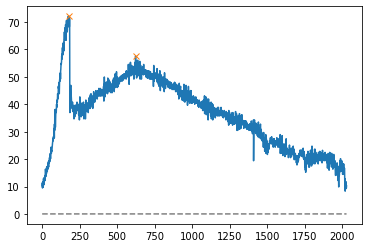

Imax:  141.3396
peak_index (array([51722]),)
x peak 2.59729
the first index max happen:  51722
Mean baseline current:  -1.884113852842
Peak Current:  141.3396
Area:  11.318662112293833
Area_simps:  11.3198785353605
Pulse Time:  182.59999999999988 milliseconds
I_final position  3255
Final current:  51.514623852842
Number of local maxima:  8


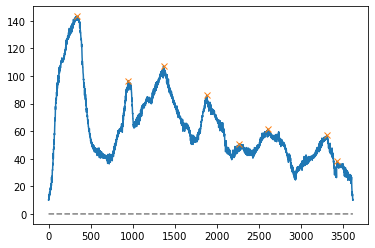

Imax:  89.75323
peak_index (array([42513]),)
x peak 5.333696
the first index max happen:  42513
Mean baseline current:  -1.857900346604
Peak Current:  89.75323
Area:  4.4967289236265415
Area_simps:  4.496762359205707
Pulse Time:  683.4999999999995 milliseconds
I_final position  3292
Final current:  10.983574346604
Number of local maxima:  1


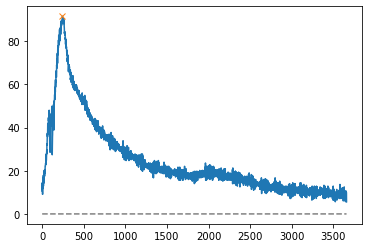

Imax:  135.6078
peak_index (array([37324]),)
x peak 10.27489
the first index max happen:  37324
Mean baseline current:  -1.8229744772999998
Peak Current:  135.6078
Area:  20.223906140267143
Area_simps:  20.221893646733804
Pulse Time:  978.9999999999992 milliseconds
I_final position  17313
Final current:  10.184406477300001
Number of local maxima:  4


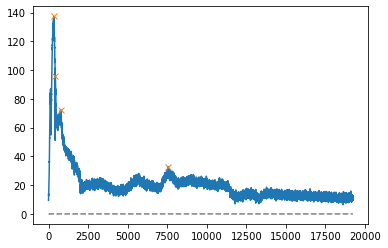

In [136]:
# Extract Metrics
# each file has 4 columns of numbers: a=time, b=current, c=noise, d=+/-b
# dt = a[i+1] - a[i] = 5.0e-05 (S)
filenames = ['001.txt', '002.txt', '003.txt', '004.txt',
             '005.txt', '006.txt', '007.txt', '008.txt']

for filename in filenames:
    a, b, c, d = np.loadtxt(filename, unpack=True)
    Imax = max(b)
    print ('Imax: ', Imax)
    # X position
    peak_index = np.where(b==Imax)
    print ('peak_index', peak_index)
    # throw away extra 
    peak_index = peak_index[0]
    # grab the first position
    x_peak = a[peak_index[0]]
    print('x peak', x_peak)
    peak_index = int(peak_index[0])
    print ('the first index max happen: ', peak_index)

    # Define noise
    if x_peak > 0.5: 
        mean = np.mean(b[range(0, 10000)])
        noise = np.std(b[range(0, 10000)])
    else: 
        mean = np.mean(b[range(50000, 60000)])
        noise = np.std(b[range(50000, 60000)])
    
    print('Mean baseline current: ', mean)
    b = np.subtract(b, mean)
    # Define discharge region
    discharge_index = []
    for i in range(peak_index-10000, peak_index+20000):
        while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
            if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
                discharge_index = np.append(discharge_index, i)
            break

    discharge_index = np.asfarray(discharge_index)
    discharge_index = discharge_index.astype(int)
    # print(discharge_index)
    discharge_time = a[discharge_index]
    discharge_current = b[discharge_index]

    print("Peak Current: ", Imax)
    # Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
    area = trapz(discharge_current, dx=0.00005)
    area_simps = simps(discharge_current, dx=0.00005)
    print("Area: ", area)
    print("Area_simps: ", area_simps)

    # Calculate discharge time
    pulseTime = max(discharge_time) - min(discharge_time)
    print("Pulse Time: ", pulseTime*1000, 'milliseconds')

    # Catch end current
    I_Final = discharge_current[int (0.9*len(discharge_current))]
    print ('I_final position ', int (0.9*len(discharge_current)))
    print('Final current: ', I_Final)
    #print(discharge_current)
    x = discharge_current
    peaks, _ = find_peaks(x, height=0, distance=100, width=50)
    
    # Find number of peaks
    peak_count = len(peaks)
    print("Number of local maxima: ", peak_count)
    
    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")
    plt.plot(np.zeros_like(x), "--", color="gray")
    plt.show()


Text(0, 0.5, 'Current (A)')

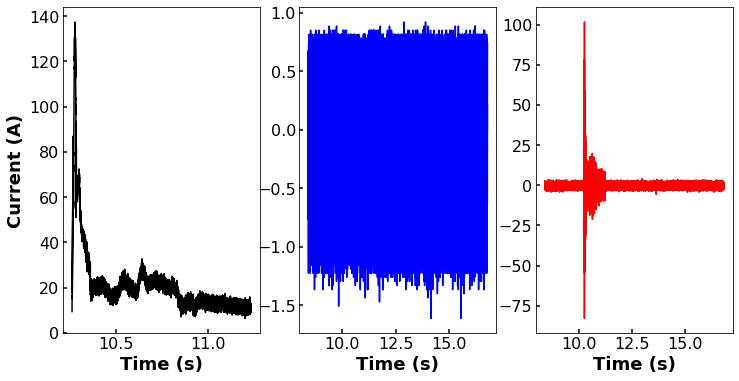

In [137]:
# Plot a single Raman spectrum

# Plot style
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=[12,6])
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax1.set_xlim(4, 6)
ax2.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax2.set_xlim(4, 6)
ax3.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
# ax3.set_xlim(4, 6)

# Plot
#ax1.plot(a, b, color='red')
ax1.plot(discharge_time, discharge_current, color='black')
ax2.plot(a, c, color='blue')
ax3.plot(a, d, color='red')

ax1.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax2.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax3.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax1.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


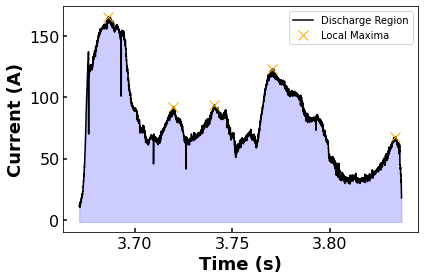

In [9]:
# Plot a single Raman spectrum

filename = '010.txt'
a, b, c, d = np.loadtxt(filename, unpack=True)

# Plot style
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
#ax.set_xlim(3, 4)

# Plot
#ax.plot(a, b, color='blue', label='Raw Data')
ax.plot(discharge_time, discharge_current, color='black', label='Discharge Region')
ax.plot(discharge_time[peaks], x[peaks], marker='x', markersize=10, color='orange', label='Local Maxima', linestyle='none')
ax.fill_between(x=discharge_time, y1=discharge_current, y2=mean, color='blue', alpha=0.2)
ax.legend()

ax.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

# Format and save
plt.tight_layout()
plt.savefig('SelectedPulseRegion.png', dpi=300) # Change file name
plt.show()

In [140]:
# Snatch all text files in current directory
import os             
all_files = os.listdir()   # imagine you're one directory above test dir
# print(all_files)  # won't necessarily be sorted
import glob
txt_files = glob.glob("./*.txt")
print(txt_files)
print(len(txt_files))

['./095.txt', './066.txt', './160.txt', './042.txt', './004.txt', './145.txt', './120.txt', './072.txt', './022.txt', './026.txt', './077.txt', './130.txt', './168.txt', './058.txt', './030.txt', './105.txt', './043.txt', './047.txt', './121.txt', './122.txt', './085.txt', './115.txt', './149.txt', './163.txt', './47 9D.txt', './033.txt', './098.txt', './048.txt', './078.txt', './086.txt', './103.txt', './096.txt', './076.txt', './055.txt', './054.txt', './082.txt', './017.txt', './107.txt', './116.txt', './041.txt', './102.txt', './123.txt', './093.txt', './125.txt', './104.txt', './025.txt', './012.txt', './001.txt', './003.txt', './018.txt', './147.txt', './023.txt', './110.txt', './008.txt', './153.txt', './021.txt', './146.txt', './172.txt', './062.txt', './157.txt', './173.txt', './053.txt', './049.txt', './087.txt', './014.txt', './037.txt', './015.txt', './052.txt', './114.txt', './024.txt', './124.txt', './169.txt', './139.txt', './073.txt', './044.txt', './144.txt', './118.tx

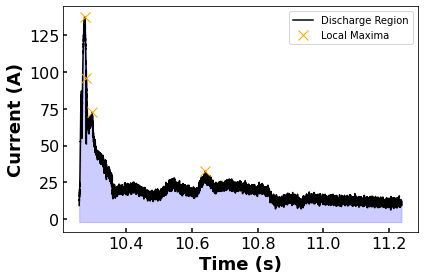

In [141]:
# Plot a single Raman spectrum

filename = txt_files[0]
a, b, c, d = np.loadtxt(filename, unpack=True)

# Plot style
ax = plt.axes()
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
#ax.set_xlim(3, 4)

# Plot
#ax.plot(a, b, color='blue', label='Raw Data')
ax.plot(discharge_time, discharge_current, color='black', label='Discharge Region')
ax.plot(discharge_time[peaks], x[peaks], marker='x', markersize=10, color='orange', label='Local Maxima', linestyle='none')
ax.fill_between(x=discharge_time, y1=discharge_current, y2=mean, color='blue', alpha=0.2)
ax.legend()

ax.set_xlabel('Time (s)', fontname="Arial", fontsize="18", fontweight = "bold")
ax.set_ylabel('Current (A)', fontname="Arial", fontsize="18", fontweight = "bold")

# Format and save
plt.tight_layout()
plt.savefig('SelectedPulseRegion.png', dpi=300) # Change file name
plt.show()

In [143]:
def process_ITcurve(filename):
    print(filename)
    # Extract metrics
    a, b, c, d = np.loadtxt(filename, unpack=True)
    
    # Define maximum
    Imax = max(b)
    # X position
    peak_index = np.where(b==Imax) # Find index of max
    peak_index = peak_index[0]
    x_peak = a[peak_index[0]]
    peak_index = int(peak_index[0])
    
    # Define noise
    if x_peak > 0.5: 
        mean = np.mean(b[range(0, 10000)])
        noise = np.std(b[range(0, 10000)])
    else: 
        mean = np.mean(b[range(50000, 60000)])
        noise = np.std(b[range(50000, 60000)])
    
    # Subtract the baseline current
    b = np.subtract(b, mean)
        
    # Define discharge region
    discharge_index = []
    for i in range(peak_index-10000, peak_index+20000):
        while b[i] > mean+8*noise or b[i-10] > mean+8*noise or b[i-20] > mean+8*noise:
            if b[i-1] > mean+8*noise and b[i+1] > mean+8*noise and b[i] > b[i-1]*.5 and b[i] > b[i-2]*.5 and b[i] > b[i-3]*.5:
                discharge_index = np.append(discharge_index, i)
            break
    discharge_index = np.asfarray(discharge_index)
    discharge_index = discharge_index.astype(int)
    discharge_time = a[discharge_index]
    discharge_current = b[discharge_index]
    # Calculate total charge passed by area under curve (related to rxn energy since I correlates to T)
    area = trapz(discharge_current, dx=0.00005)
    # area_simps = simps(discharge_current, dx=0.00005)
    # print("Area: ", area)
    # print(area_simps)
    
    # Calculate discharge time
    pulseTime = max(discharge_time) - min(discharge_time)
    # print("Pulse Time: ", pulseTime)
    
    # Catch end current
    I_Final = discharge_current[int(0.9*len(discharge_current))]

    from scipy.signal import find_peaks

    x = discharge_current
    peaks, _ = find_peaks(x, height=0, distance=100, width=50)
    # Find number of peaks
    peak_count = len(peaks)

    # Assimilate
    current_stats = [Imax, np.mean(discharge_current), area, pulseTime, I_Final, peak_count]
    return current_stats

In [144]:
# Pull text files, assemble into statistics
big_stats = np.asarray([])

for i in range(0, len(txt_files)):
    filename = txt_files[i]
    stats = process_ITcurve(filename)
    stats = np.append(filename, stats)
    print(stats)
    if len(big_stats) == 0:
        big_stats = np.append(big_stats, stats)
    else:
        big_stats = np.vstack((big_stats, stats))
print(big_stats)

./095.txt
['./095.txt' '247.1871' '129.12367654024686' '11.781903438746077'
 '0.09159999999999968' '56.011661029014' '1.0']
./066.txt
['./066.txt' '496.7122' '344.49368274699435' '7.921622828949283'
 '0.023350000000000204' '464.905899631777' '1.0']
./160.txt
['./160.txt' '412.2635' '61.89934360905248' '11.695476981202159'
 '0.1922000000000006' '28.905478566184' '5.0']
./042.txt
['./042.txt' '121.4693' '32.83178308972803' '6.779300060033613'
 '0.20845000000000002' '15.567960404498' '5.0']
./004.txt
['./004.txt' '102.7453' '54.067667317923004' '17.358075406305225'
 '0.33094999999999963' '24.752349279144' '8.0']
./145.txt
['./145.txt' '94.33868' '40.449177236198814' '15.000008883085442'
 '0.3863500000000002' '49.582013677752' '9.0']
./120.txt
['./120.txt' '468.8174' '136.70581705852516' '24.20996607677439'
 '0.17804999999999982' '16.694755808384' '2.0']
./072.txt
['./072.txt' '623.5764' '159.86592161946942' '23.955408377835326'
 '0.15039999999999987' '15.54029484336' '1.0']
./022.txt
['./

['./052.txt' '189.869' '35.81643066567098' '13.581092862544072'
 '0.3838999999999997' '20.079126067306' '2.0']
./114.txt
['./114.txt' '461.175' '134.7390141816624' '29.15030824831808'
 '0.2180500000000003' '21.2040961916' '4.0']
./024.txt
['./024.txt' '401.9462' '139.71693856452816' '15.193628755277995'
 '0.10964999999999936' '52.653236788895995' '2.0']
./124.txt
['./124.txt' '615.1698' '102.62333649099146' '19.98011305357166'
 '0.2189000000000001' '36.511673487653' '4.0']
./169.txt
['./169.txt' '185.2835' '91.73804607441733' '8.310964181295112'
 '0.09119999999999973' '31.836768941967' '2.0']
./139.txt
['./139.txt' '221.585' '67.89254649460887' '11.514141344978992'
 '0.17100000000000026' '12.894142133465' '1.0']
./073.txt
['./073.txt' '648.4143' '135.20341088363656' '23.430250451052384'
 '0.17700000000000005' '10.204162136666001' '1.0']
./044.txt
['./044.txt' '87.4605' '38.286336605080216' '2.2564475709854284'
 '0.059550000000000214' '33.566703180992' '2.0']
./144.txt
['./144.txt' '377

['./020.txt' '234.195' '66.10929123063478' '11.743640679156966'
 '0.17969999999999997' '50.372849306064' '6.0']
./127.txt
['./127.txt' '533.0137' '142.67806510744808' '23.36312748628334' '0.17035'
 '13.654255225616001' '2.0']
./028.txt
['./028.txt' '114.5911' '88.987416977716' '2.8909901494638843'
 '0.032849999999999824' '108.37746123771599' '1.0']
./148.txt
['./148.txt' '97.39565' '35.65019021468951' '8.976233737139893' '0.2538'
 '19.809387878509998' '5.0']
./129.txt
['./129.txt' '463.0856' '67.72805777247788' '19.03790484725771'
 '0.2829500000000005' '25.857182716448' '2.0']
./170.txt
['./170.txt' '104.2738' '53.62768868920173' '10.953000337169193'
 '0.20594999999999963' '28.589733005236' '2.0']
./075.txt
['./075.txt' '703.4397' '242.99931875575697' '24.979689393524627'
 '0.10299999999999976' '26.185729343792' '1.0']
./135.txt
['./135.txt' '533.778' '82.86029109083542' '20.341758871004288'
 '0.2472000000000003' '34.26288741609' '3.0']
./100.txt
['./100.txt' '259.0329' '77.48450525518

In [145]:
# corrections [048, 049, 127, 136, 137]
big_stats [big_stats [:, 0]=='./048.txt'] = ['./048.txt', '193.3081',	'114.1420125',	'1.568654439',
                                             '0.0138',	'184.8622274',	'1']
big_stats [big_stats [:, 0]=='./049.txt'] = ['./049.txt', '138.6647',	'37.14872316',	'12.26229407',
                                             '0.33335',	'15.14747545',	'3']
big_stats [big_stats [:, 0]=='./127.txt'] = ['./127.txt', '604.8525',	'187.983265',	'22.47281631',
                                             '0.12025',	'44.33193156',	'2']
big_stats [big_stats [:, 0]=='./136.txt'] = ['./136.txt', '263.2362',	'73.5173143',	'22.76761944',
                                             '0.3129',	'17.67723297',	'3']
big_stats [big_stats [:, 0]=='./137.txt'] = ['./137.txt', '486.395',	'57.78712883',	'26.00664167',
                                             '0.467',	'9.68631173',	'3']

In [146]:
# Add previous data for 4 samples [9, 61, 90, 174]
extra_list = [['./009.txt', '192.5438', '28.83309255', '13.72108063',
               '0.48165', '12.90866273' ,'1.0'], 
              ['./061.txt', '493.6553', '98.94093448', '19.83224227',
               '0.23015', '8.214572707', '1'],
              ['./090.txt', '497.8586', '113.1098814', '21.42253111',
               '0.2103', '6.742412356', '1'],
              ['./174.txt', '263.2362', '156.7744221', '8.849149835',
               '0.0566', '90.03049082', '1']]
extra = np.array (extra_list).reshape(len(extra_list), np.shape (big_stats[0])[0])
big_stats_extra = np.concatenate ((big_stats, extra), axis=0)
print (extra.shape)
print (big_stats_extra.shape)

(4, 7)
(175, 7)


In [147]:
# Create an Excel worksheet
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook('IT_Features_All.xlsx')
worksheet = workbook.add_worksheet()

# Add a bold format to use to highlight cells.
bold = workbook.add_format({'bold': True})

# Write some data headers.
worksheet.write('A1', 'Filename', bold)
worksheet.write('B1', 'Peak Current', bold)
worksheet.write('C1', 'Mean Current', bold)
worksheet.write('D1', 'Area Under Curve', bold)
worksheet.write('E1', 'Pulse Time', bold)
worksheet.write('F1', 'Final Current', bold)
worksheet.write('G1', 'Local Maxima', bold)

# Start from the first cell. Rows and columns are zero indexed.
row = 1
col = 0

for filename, Imax, Imean, Area, PulseTime, Ifinal, LocMax in (big_stats_extra):
    worksheet.write(row, col, filename)
    worksheet.write(row, col+1, float(Imax))
    worksheet.write(row, col + 2, float(Imean))
    worksheet.write(row, col + 3, float(Area))
    worksheet.write(row, col + 4, float(PulseTime))
    worksheet.write(row, col + 5, float(Ifinal))
    worksheet.write(row, col + 6, float(LocMax))
    row += 1
    
workbook.close()